In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
from pycbc import distributions as dist
from pycbc import conversions as con

## To generate mchirp and q (mass ratio) from uniform mass1 and mass2
Note that $P(m_1,m_2)dm_1dm_2 = P(\mathcal{M}_c,q)d\mathcal{M}_cdq$

The jacobian to transform $(\mathcal{M}_c,q)$ to $(m1,m2)$ is $\frac{\partial(m_1,m_2)}{\partial(\mathcal{M}_c,q)} = \mathcal{M}_c \left(\frac{1+q}{q^3}\right)^{2/5}$ (e.g., see https://github.com/gwastro/pycbc/blob/master/pycbc/transforms.py#L416)

Because $P(m_1,m_2) = const$, then $P(\mathcal{M}_c,q) = P(\mathcal{M}_c)P(q) \propto \mathcal{M}_c \left(\frac{1+q}{q^3}\right)^{2/5}$

Then $P(\mathcal{M}_c) \propto \mathcal{M}_c$, $P(q) \propto \left(\frac{1+q}{q^3}\right)^{2/5}$

In [24]:
size = 100000
minmc = 5
maxmc = 100
minq = 1/4
maxq = 1/minq
mc = dist.MchirpfromUniformMass1Mass2(value=(minmc,maxmc)).rvs(size)
q = dist.QfromUniformMass1Mass2(value=(minq,maxq)).rvs(size)
m1 = con.mass1_from_mchirp_q(mc['value'],q['value'])
m2 = con.mass2_from_mchirp_q(mc['value'],q['value'])

Text(0, 0.5, 'Mass Ratio')

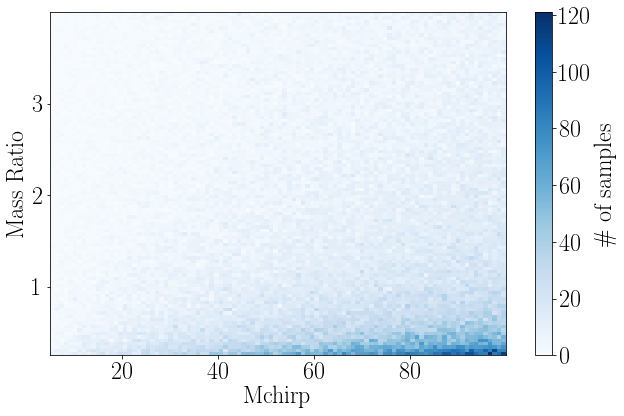

In [25]:
plt.hist2d(mc['value'], q['value'],bins=100,cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('Mchirp')
plt.ylabel('Mass Ratio')

Text(0, 0.5, 'mass2')

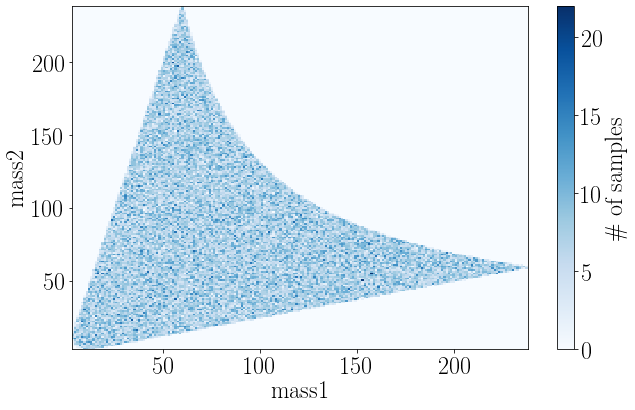

In [26]:
#plt.figure(figsize = (fig_width,fig_width))
plt.hist2d(m1, m2, bins=200,cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('mass1')
plt.ylabel('mass2')

# Double checking Mc and q  indeed follow the distribution we write above 

In [27]:
xq = np.linspace(minq,maxq,100)
yq = ((1+xq)/(xq**3))**(2/5)

In [28]:
qhist=np.histogram(q['value'],bins=100,density=True)

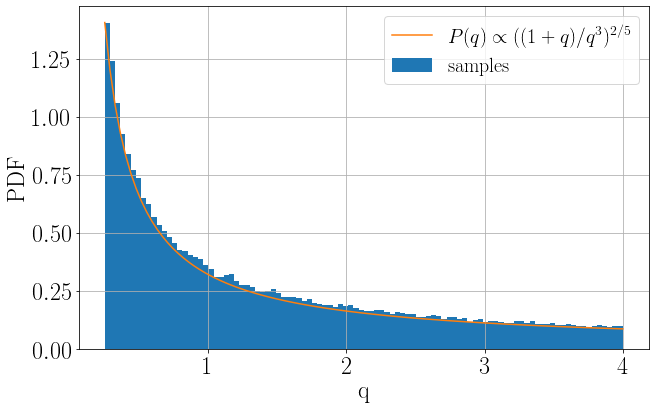

In [29]:
plt.hist(q['value'],density=True,bins=100,label='samples')
plt.plot(xq,yq/yq[0]*qhist[0][0],label='$P(q)\propto((1+q)/q^3)^{2/5}$')
plt.xlabel('q')
plt.ylabel('PDF')
plt.legend()

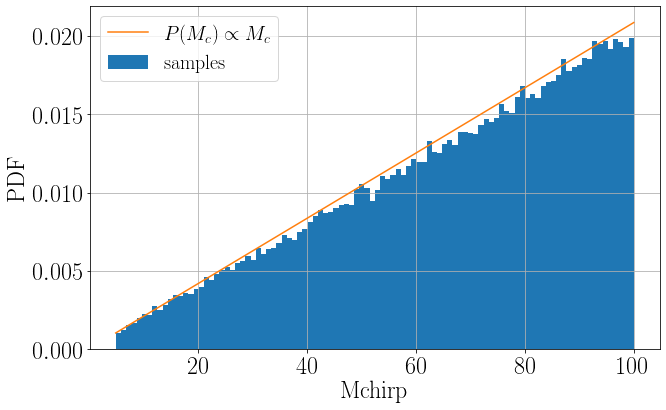

In [30]:
xmc = np.linspace(minmc,maxmc,100)
ymc = xmc
mchist=np.histogram(mc['value'],bins=100,density=True)
plt.hist(mc['value'],density=True,bins=100,label='samples')
plt.plot(xmc,ymc/ymc[0]*mchist[0][0],label='$P(M_c)\propto M_c$')
plt.xlabel('Mchirp')
plt.ylabel('PDF')
plt.legend()

# If Mc and Q are from uniform distribution

In [31]:
mc = np.random.uniform(minmc,maxmc,size)
q = np.random.uniform(minq,maxq,size)

Text(0, 0.5, 'Mass Ratio')

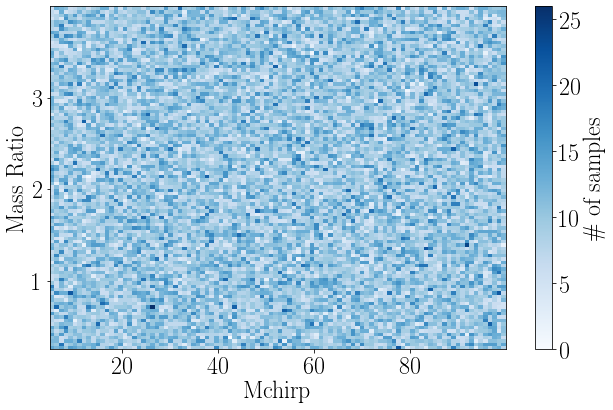

In [32]:
plt.hist2d(mc, q,bins=100, cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('Mchirp')
plt.ylabel('Mass Ratio')

In [33]:
m1 = con.mass1_from_mchirp_q(mc,q)
m2 = con.mass2_from_mchirp_q(mc,q)

Text(0, 0.5, 'mass2')

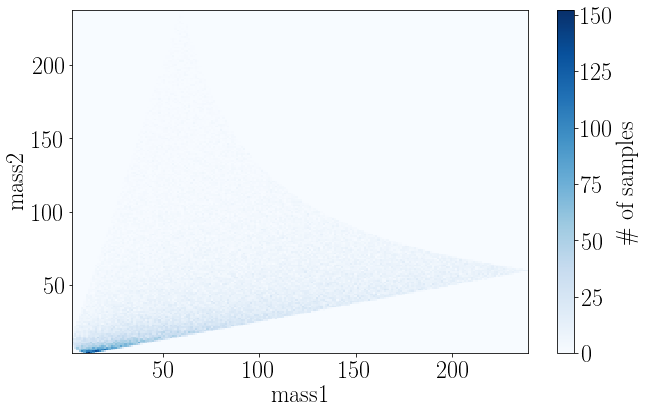

In [34]:
plt.hist2d(m1, m2, bins=200,cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('mass1')
plt.ylabel('mass2')

# If mass1 and mass2 are drawn from uniform distribution in a square region

In [35]:
a = np.random.uniform(10,100,size)
b = np.random.uniform(10,100,size)

Text(0, 0.5, 'mass2')

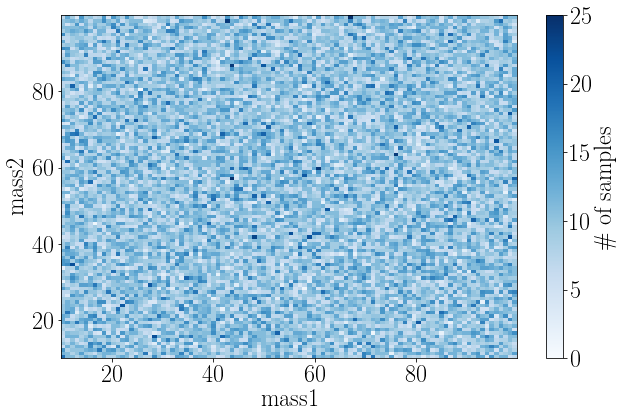

In [36]:
plt.hist2d(a,b,bins=100,cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('mass1')
plt.ylabel('mass2')

In [37]:
m1 = con.primary_mass(a,b)
m2 = con.secondary_mass(a,b)

Text(0, 0.5, 'secondary mass')

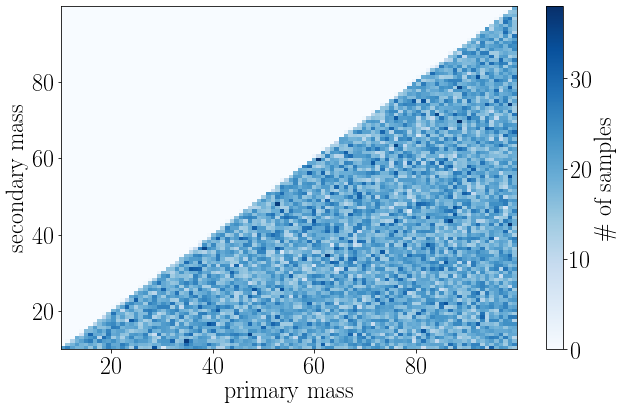

In [38]:
plt.hist2d(m1,m2,bins=100,cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('primary mass')
plt.ylabel('secondary mass')

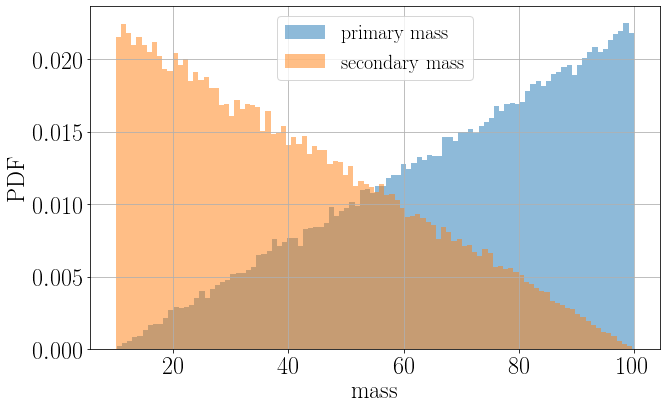

In [39]:
plt.hist(m1,alpha=0.5,density=True,bins=100,label='primary mass')
plt.hist(m2,alpha=0.5,density=True,bins=100,label='secondary mass')
plt.xlabel('mass')
plt.ylabel('PDF')
plt.legend()

In [40]:
mc2 = con.mchirp_from_mass1_mass2(m1,m2)
q2 = con.q_from_mass1_mass2(m1,m2)

Text(0, 0.5, 'Mass Ratio')

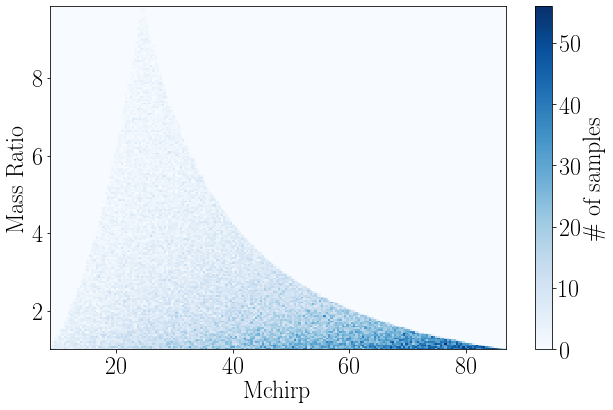

In [41]:
plt.hist2d(mc2,q2,bins=200,cmap='Blues')
plt.colorbar(label=r'$\#$ of samples')
plt.xlabel('Mchirp')
plt.ylabel('Mass Ratio')